In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [82]:
df_a=pd.read_csv("agriculture_dataset.csv")
df_a.tail(40)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
4559,F00008015,2015,0,1,2,25,37.0,8,2,0
4560,F00008018,2015,0,1,2,30,30.0,17,1,0
4561,F00008019,2016,0,1,2,30,39.0,10,3,0
4562,F00008021,2016,0,1,2,40,10.0,37,2,0
4563,F00008023,2016,0,1,2,40,38.0,12,2,0
4564,F00008025,2016,0,1,2,50,23.0,27,2,0
4565,F00008026,2016,0,1,2,50,36.0,11,2,0
4566,F00008027,2016,0,1,2,60,26.0,23,3,0
4567,F00008032,2016,0,1,2,10,22.0,27,2,1
4568,F00008034,2016,0,1,2,10,22.0,29,2,1


In [83]:
#toc check out datatype #observation= except id i.e object all other data are of integer type
df_a.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [84]:
#cheking the unique types present in each column
df_a.nunique()

ID                         4599
Estimated_Insects_Count      71
Crop_Type                     2
Soil_Type                     2
Pesticide_Use_Category        3
Number_Doses_Week            20
Number_Weeks_Used            63
Number_Weeks_Quit            47
Season                        3
Crop_Damage                   3
dtype: int64

In [85]:
df_a.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [86]:
df_a["Number_Weeks_Used"].value_counts()

20.0    209
30.0    194
25.0    165
40.0    133
35.0    128
       ... 
62.0      5
59.0      5
65.0      3
66.0      3
64.0      1
Name: Number_Weeks_Used, Length: 63, dtype: int64

In [87]:
#Filling nan value with previous values as on analysis its been found that the previous data is more related to previous coolumn data
df_a["Number_Weeks_Used"].fillna(method="bfill",inplace=True)

In [88]:
df_a.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [89]:
df=df_a.copy()

# Finding correlation

In [90]:
df_corr=df.corr()
df_corr


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.454488,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,0.000371,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.096036,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.396178,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.100430,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.454488,0.000371,-0.096036,0.396178,0.100430,1.000000,-0.437289,-0.010936,0.238072
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.437289,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010936,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.238072,-0.152918,-0.016196,1.000000


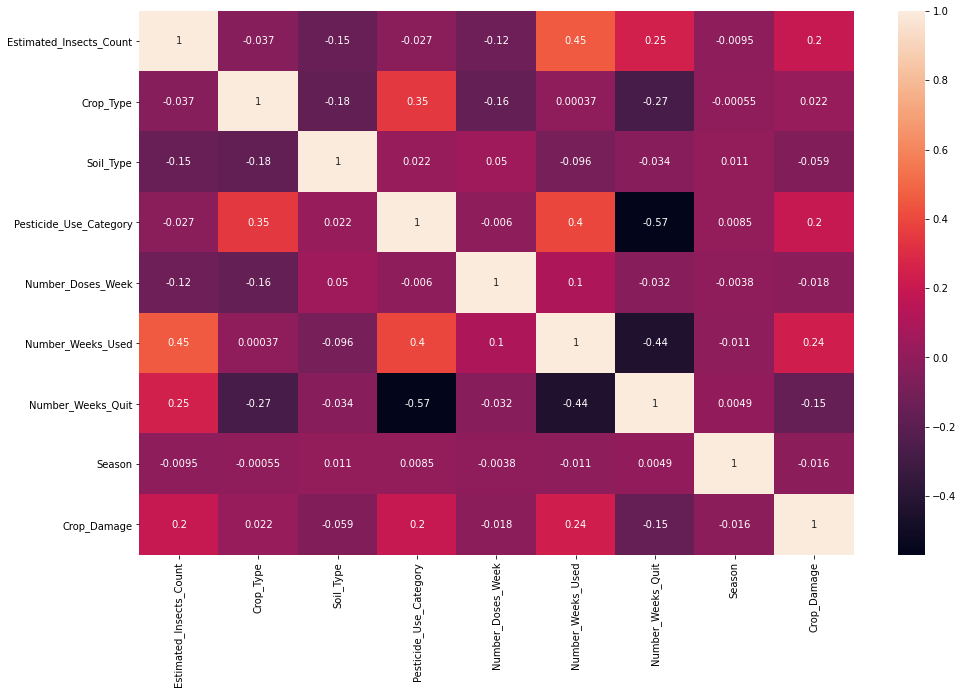

In [91]:
#plotting heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df_corr,annot=True)
plt.show()


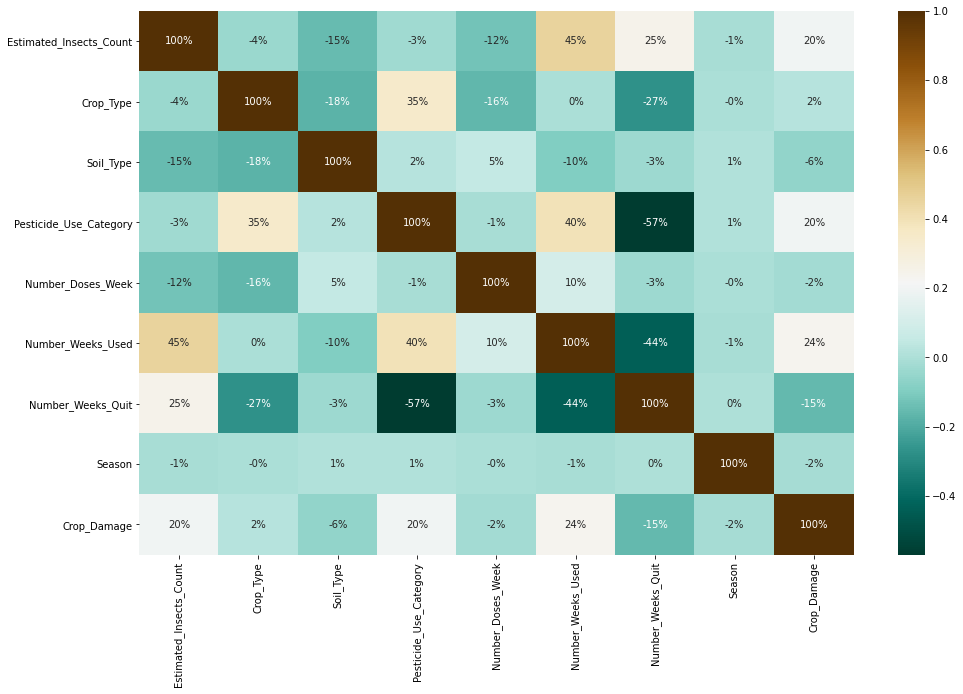

In [92]:
#ccorrelation
plt.figure(figsize=(16,10))
sns.heatmap(df_corr,annot=True,fmt=".0%",cmap="BrBG_r")
plt.show()

observation

-->insect count is higly correlated with pesticide used ,more insec led to the more use of pestecide per week

--->also there is mild correlation bw the crop damage and number week used  with estimated_insect count


Text(0.5, 1.0, 'correlation with target variable  type of crop damage')

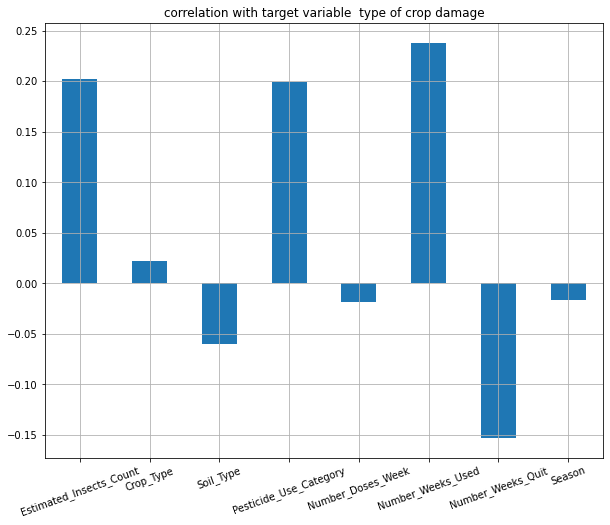

In [93]:
plt.figure(figsize=(10,8))
comparison=df.drop("Crop_Damage",axis=1).corrwith(df["Crop_Damage"])
comparison.plot(kind="bar",grid=True)
plt.xticks(rotation=20)
plt.title("correlation with target variable  type of crop damage")

observation

--->Estimated_insect_count, Pesticide_use_Category and number_week_used these variable impact target in a positive way 

# Univariate Analysis¶

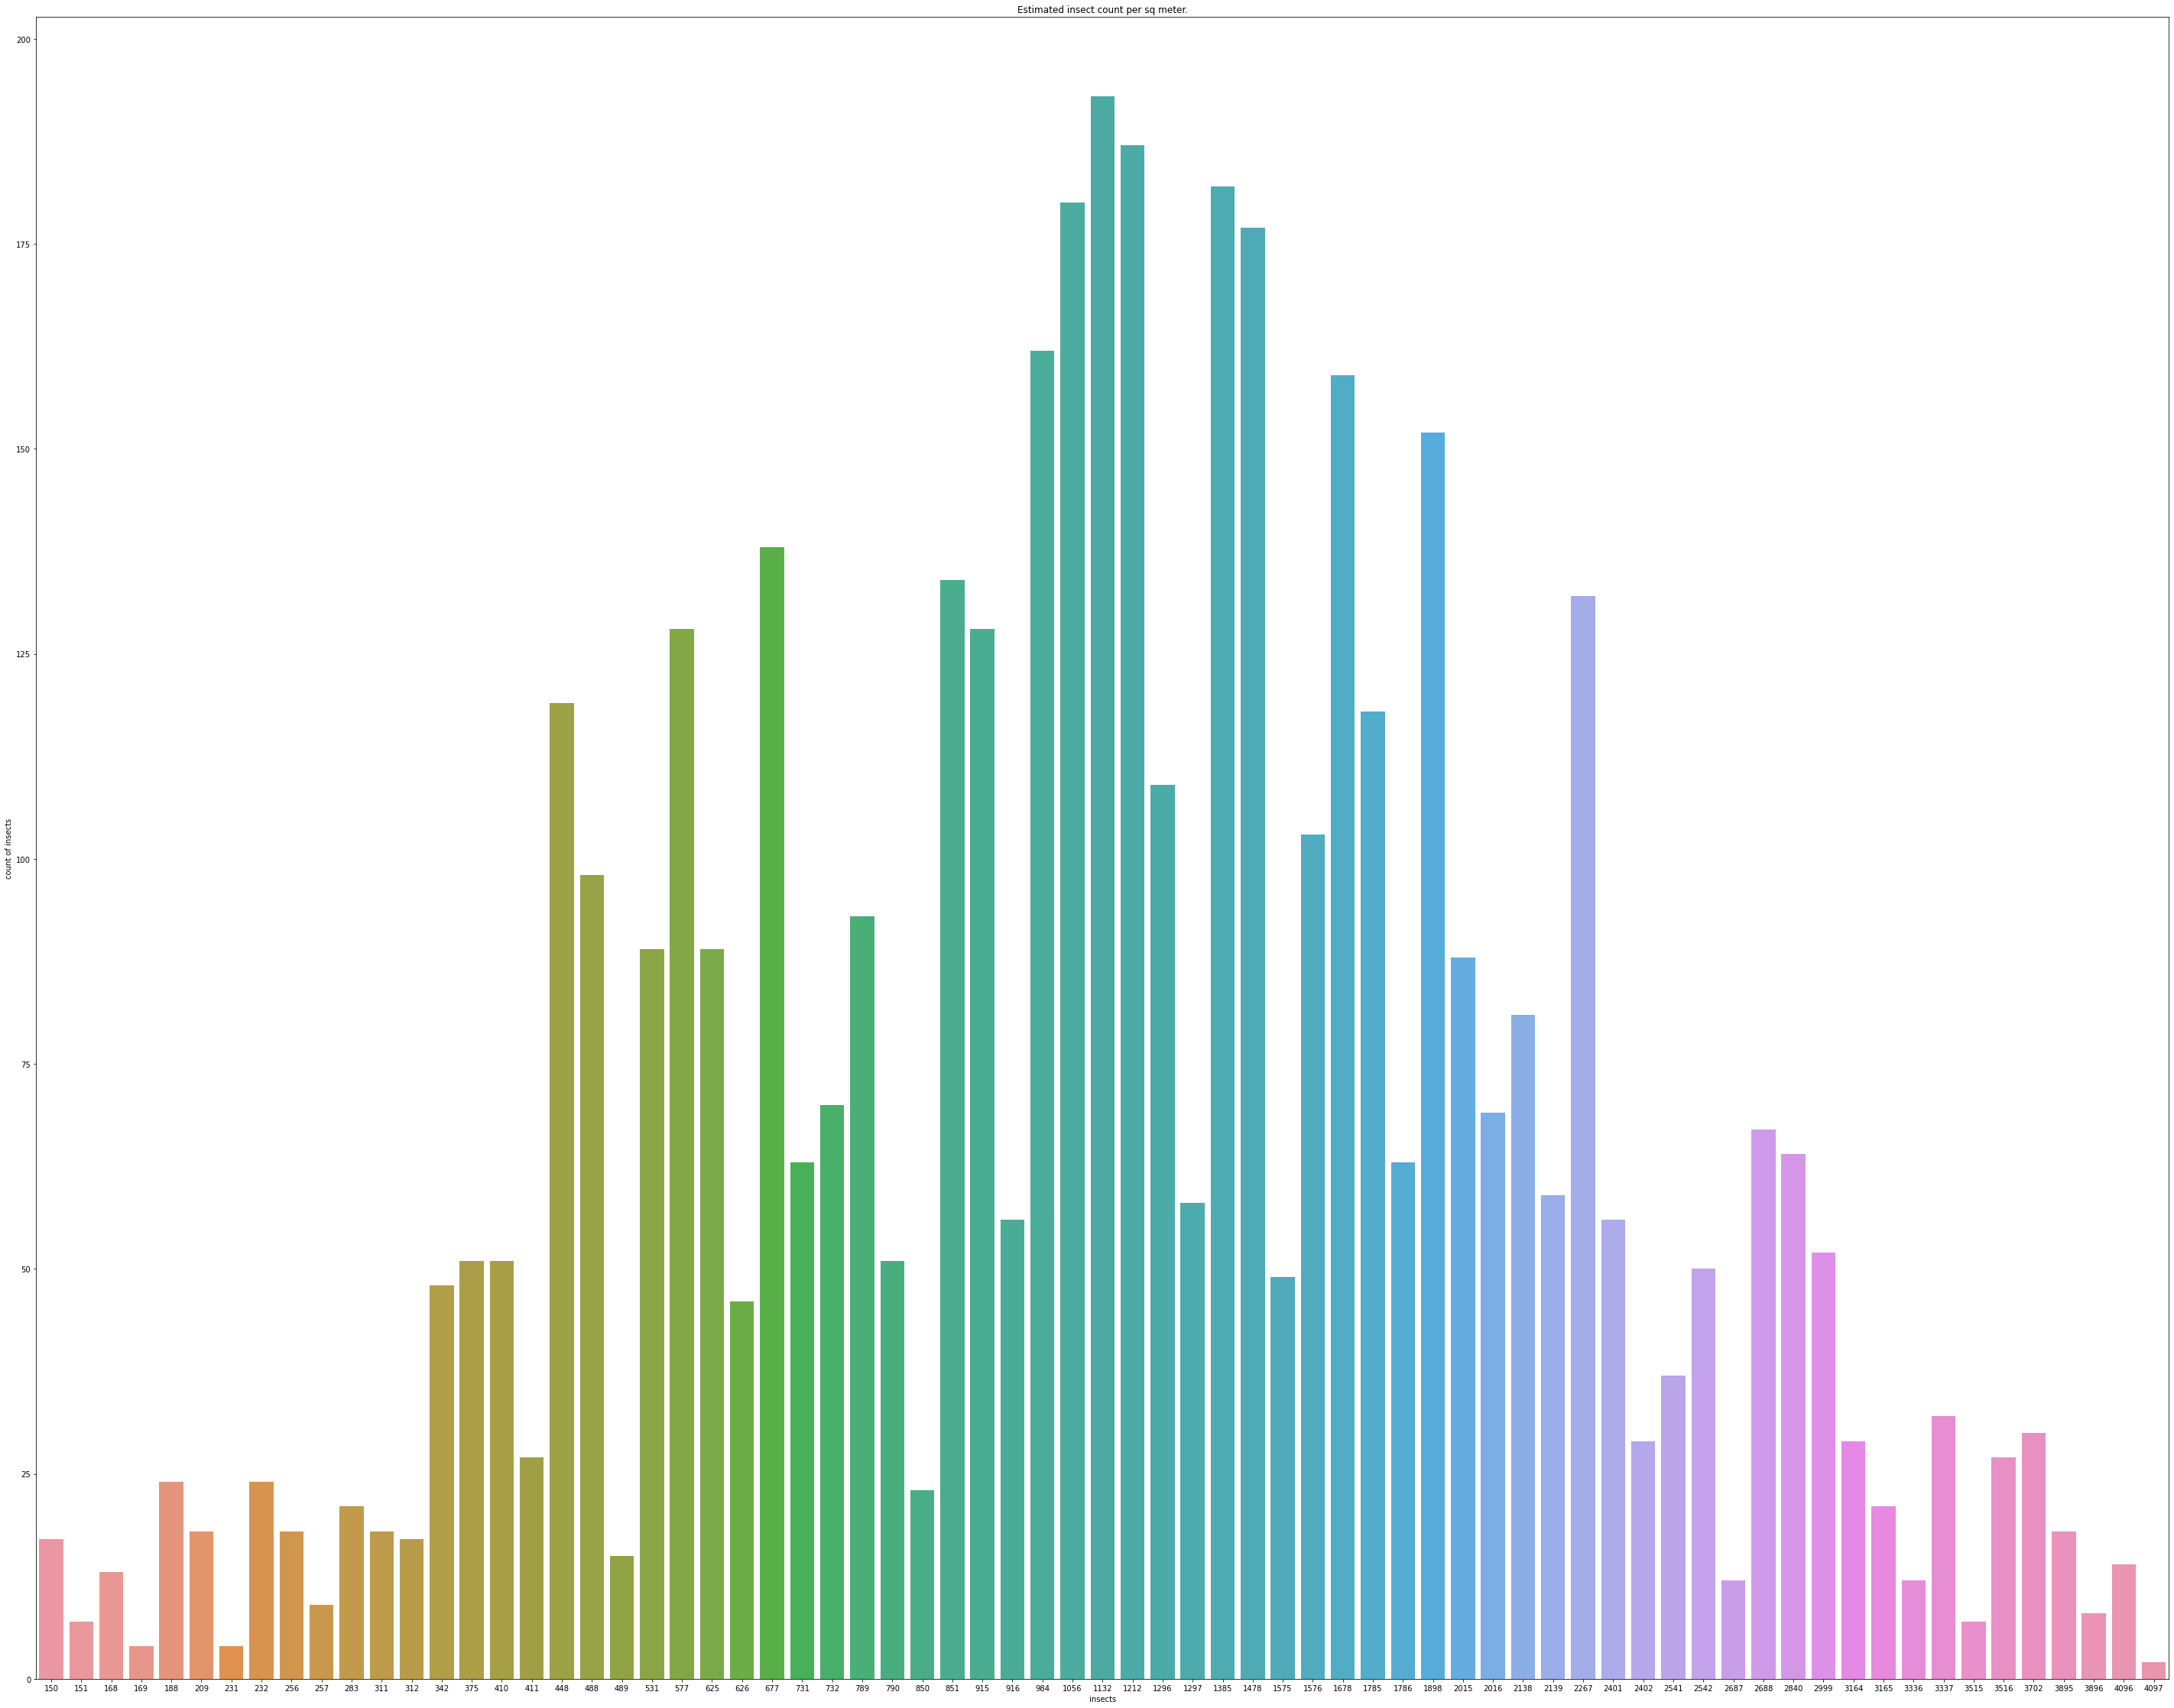


  1132    193
1212    187
1385    182
1056    180
1478    177
       ... 
3515      7
151       7
169       4
231       4
4097      2
Name: Estimated_Insects_Count, Length: 71, dtype: int64


In [94]:
#checking the insect density
plt.figure(figsize=(50,40))
sns.countplot(x='Estimated_Insects_Count',data=df)
plt.title("Estimated insect count per sq meter.")
plt.xlabel("insects")
plt.ylabel("count of insects")
plt.show()
print("\n ",df.Estimated_Insects_Count.value_counts())

observation

The density which is 1132  insect per sq meter is most occured in the data set , while least occurence is of density which 4097 insect /sqm

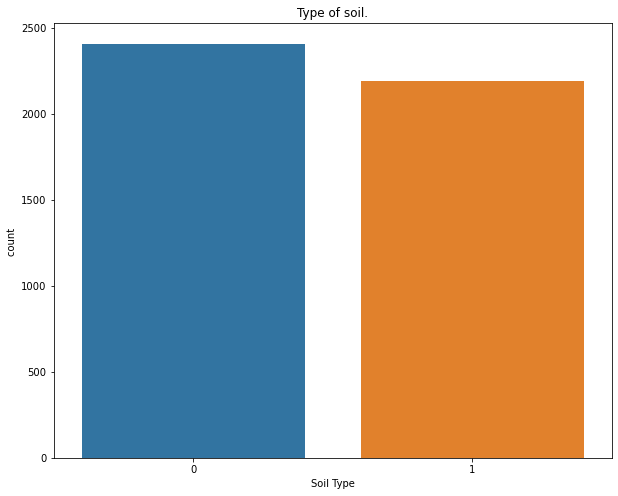


  0    2407
1    2192
Name: Soil_Type, dtype: int64


In [95]:
#checking of soil type
plt.figure(figsize=(10,8 ))
sns.countplot(x='Soil_Type',data=df)
plt.title("Type of soil.")
plt.xlabel("Soil Type")
plt.ylabel("count ")
plt.show()
print("\n ",df.Soil_Type.value_counts())

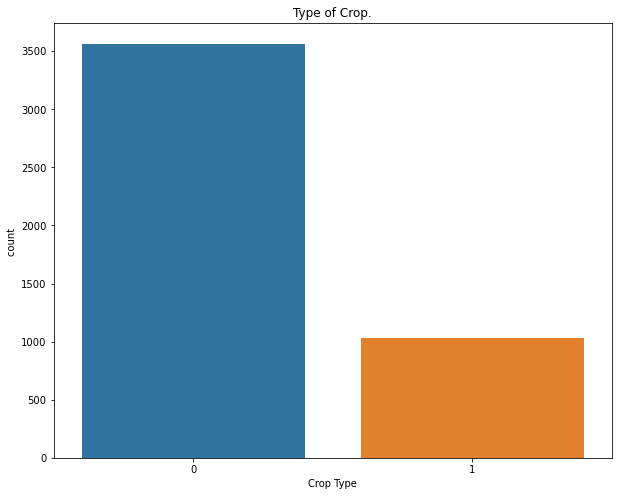


  0    3565
1    1034
Name: Crop_Type, dtype: int64


In [96]:
#checking of Crop type
plt.figure(figsize=(10,8 ))
sns.countplot(x='Crop_Type',data=df)
plt.title("Type of Crop.")
plt.xlabel("Crop Type")
plt.ylabel("count ")
plt.show()
print("\n ",df.Crop_Type.value_counts())

observation 

--->while sooil type data is approx 50 percent count each type ,whereas crop type 75 percent is of 0 type and 25 is of 1 type

Text(0, 0.5, 'count')

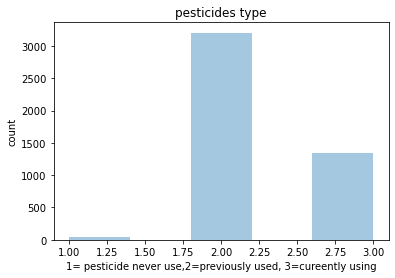

In [97]:
sns.distplot(df['Pesticide_Use_Category'],kde=False,bins=5)
plt.title("pesticides type")
plt.xlabel("1= pesticide never use,2=previously used, 3=cureently using")
plt.ylabel("count")

observation

--->mostly everyone has previously used pesticides, and very rare ones are those who never used pesticide

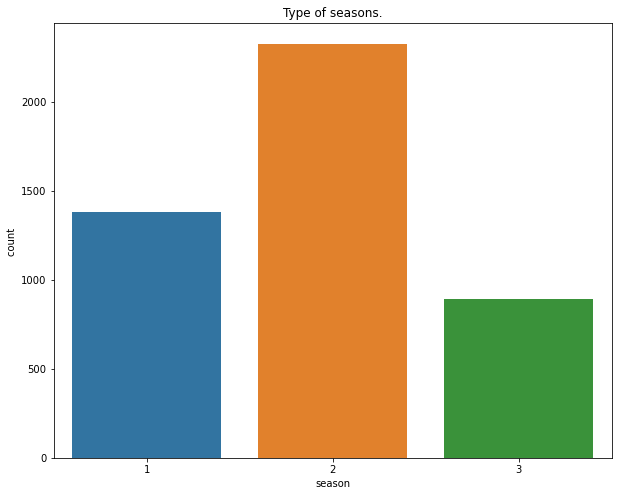


  2    2327
1    1379
3     893
Name: Season, dtype: int64


In [98]:
#checking season
plt.figure(figsize=(10,8 ))
sns.countplot(x='Season',data=df)
plt.title("Type of seasons.")
plt.xlabel("season")
plt.ylabel("count ")
plt.show()
print("\n ",df.Season.value_counts())

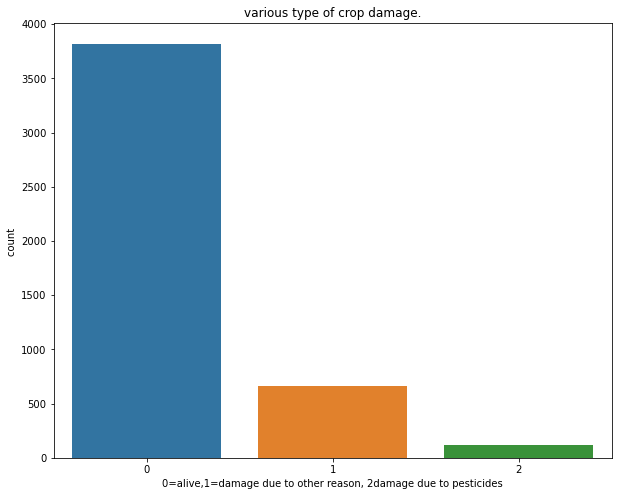


  0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


In [99]:
#checking season
plt.figure(figsize=(10,8 ))
sns.countplot(x='Crop_Damage',data=df)
plt.title("various type of crop damage.")
plt.xlabel("0=alive,1=damage due to other reason, 2damage due to pesticides")
plt.ylabel("count ")
plt.show()
print("\n ",df.Crop_Damage.value_counts())

observation

-->large number of crops are alive 

--->very few crops are damged due to pesticide

# BI-variate analysis

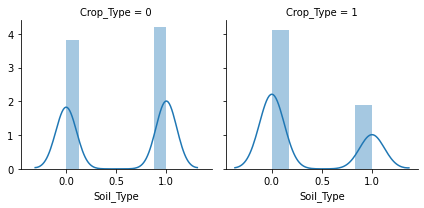

In [100]:
#exploring soil type with crop type
sns.FacetGrid(df,col="Crop_Type").map(sns.distplot,"Soil_Type")

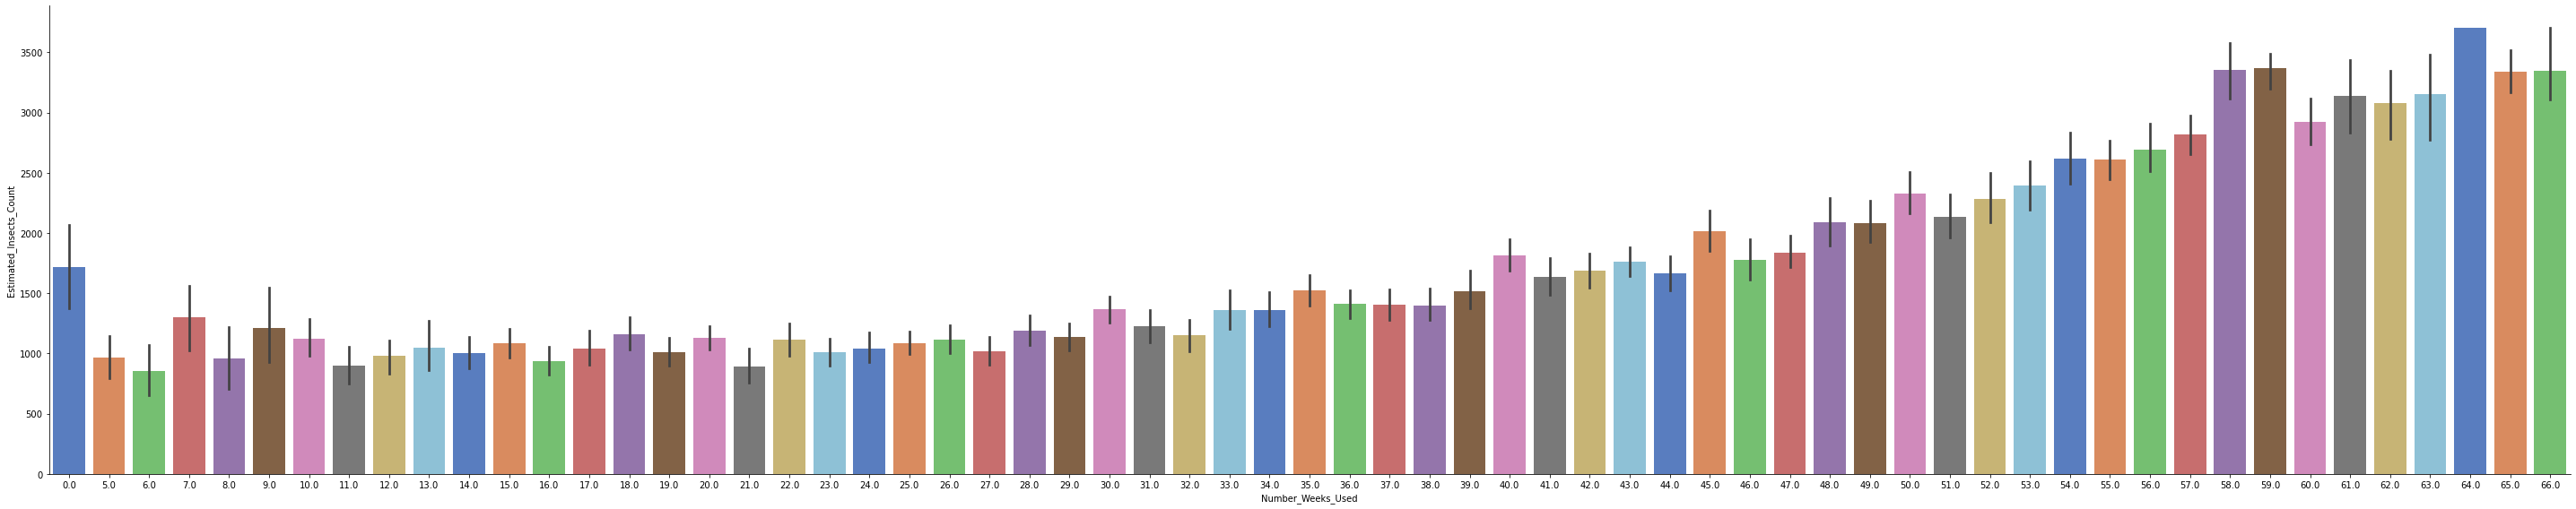

In [101]:

sns.factorplot(x="Number_Weeks_Used",y="Estimated_Insects_Count",data=df,kind="bar",size=8,palette="muted",aspect=5)

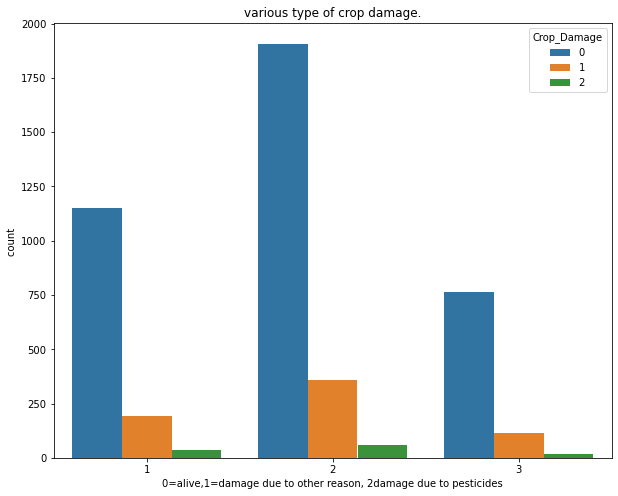

In [102]:
plt.figure(figsize=(10,8 ))
sns.countplot(x='Season',hue="Crop_Damage",data=df)
plt.title("various type of crop damage.")
plt.xlabel("0=alive,1=damage due to other reason, 2damage due to pesticides")
plt.ylabel("count ")
plt.show()

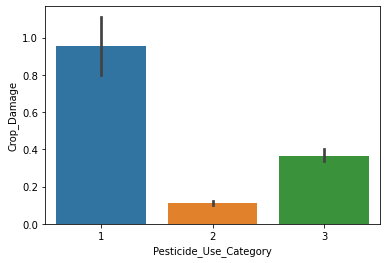

In [103]:
sns.barplot(x="Pesticide_Use_Category",y="Crop_Damage",data=df)

# Multivariate Analysis

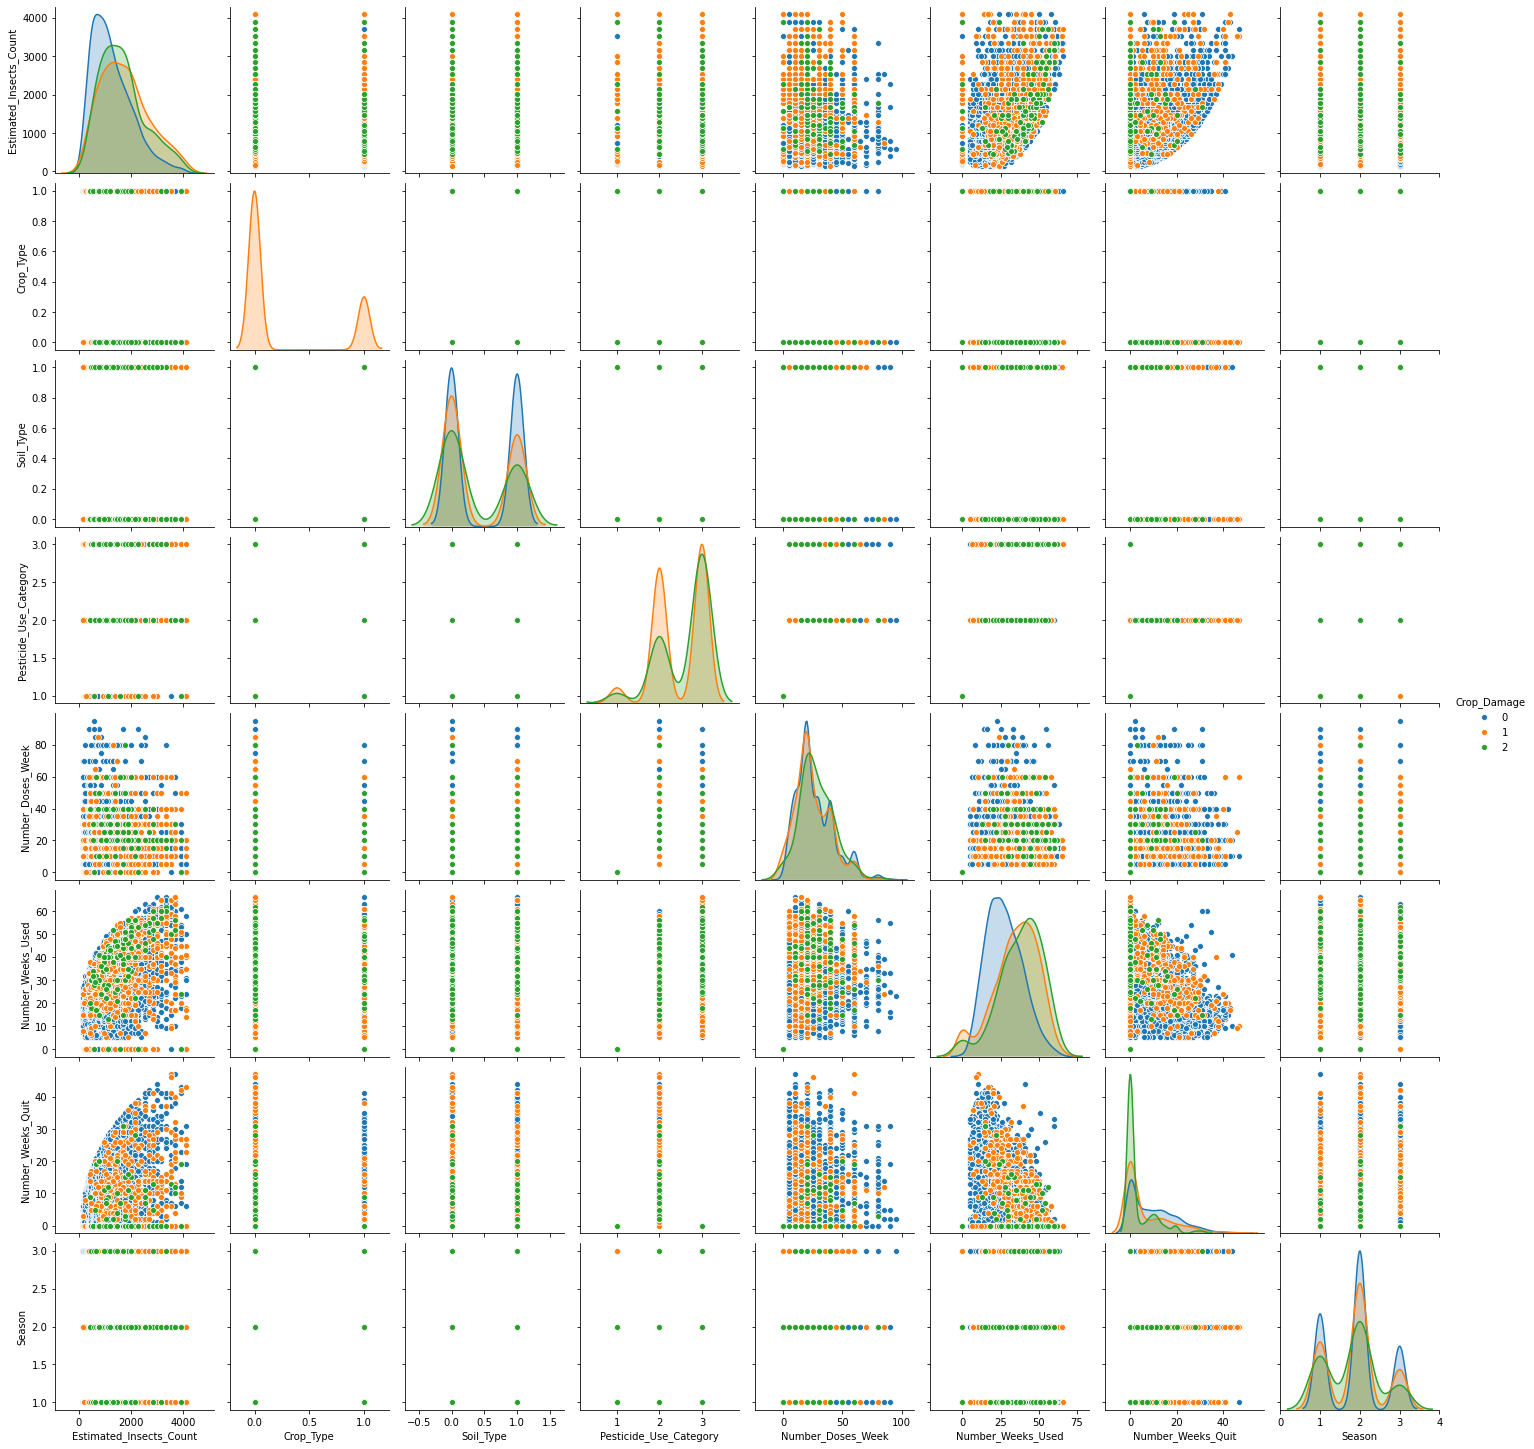

In [104]:
sns.pairplot(df,hue="Crop_Damage")

# checking outliers

Estimated_Insects_Count        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Crop_Type                   AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Soil_Type                    AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Pesticide_Use_Category      AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Number_Doses_Week           AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Number_Weeks_Used             AxesSubplot(0.125,0.518913;0.133621x0.16413)
Number_Weeks_Quit          AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Season                      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Crop_Damage                AxesSubplot(0.606034,0.518913;0.133621x0.16413)
dtype: object

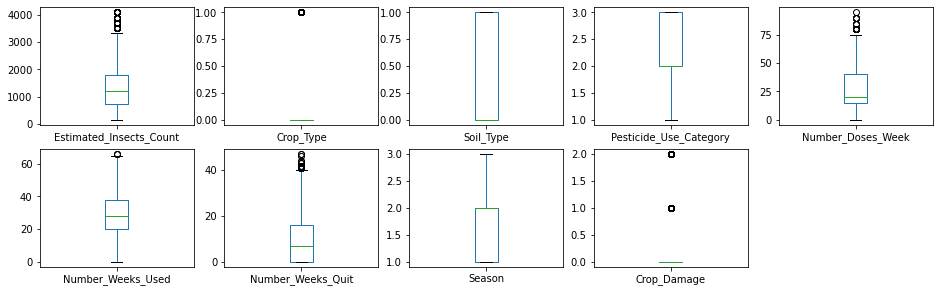

In [105]:
#it will show the outliers 
df.plot(kind="box",subplots=True,layout=(4,5),figsize=(16,10))

In [106]:
#Id is no use in the dataset for modeling
df.drop("ID",axis=1,inplace=True)

In [107]:
df.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [132]:
#removing ouliers
from scipy.stats import zscore
z_scr=abs(zscore(df))
threshold=3
print(np.where(z_scr>3))
df_zscr=df[(z_scr<3).all(axis=1)]

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  377,  384,  453,  458,  466,  480,  510,  517,  522,  557,
        595,  612,  634,  693,  702,  703,  704,  705,  706,  807,  819,
        855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067, 1097,
       1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339, 1340,
       1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349, 1406,
       1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868, 2019,
       2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183, 2185,
       2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553, 2565,
       2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702, 2710,
       2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806, 2814,
       2828, 2829, 2834, 2841, 2842, 2851, 2860, 2

In [133]:
print("previous =",df.shape,"\n after z score =",df_zscr.shape)

previous = (4599, 9) 
 after z score = (4376, 9)


# Skewness checking

In [134]:
df_zscr.skew()

Estimated_Insects_Count    0.794068
Crop_Type                  1.309105
Soil_Type                  0.078698
Pesticide_Use_Category     0.749111
Number_Doses_Week          0.712831
Number_Weeks_Used          0.281046
Number_Weeks_Quit          0.815099
Season                     0.142340
Crop_Damage                1.997716
dtype: float64

In [135]:
#further treating the skewness
for col in df.columns:
    if df_zscr[col].skew()>0.55:
        df_zscr[col]=np.sqrt(df_zscr[col])

In [136]:
df_zscr.skew()

Estimated_Insects_Count    0.182991
Crop_Type                  1.309105
Soil_Type                  0.078698
Pesticide_Use_Category     0.584715
Number_Doses_Week         -0.095007
Number_Weeks_Used          0.281046
Number_Weeks_Quit          0.009398
Season                     0.142340
Crop_Damage                1.997716
dtype: float64

In [137]:
df_zscr

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,13.711309,1.0,0,1.000000,0.000000,0.0,0.000000,1,0.0
1,14.456832,1.0,0,1.000000,0.000000,0.0,0.000000,2,1.0
2,16.031220,1.0,0,1.000000,0.000000,0.0,0.000000,2,1.0
3,16.031220,1.0,1,1.000000,0.000000,0.0,0.000000,2,1.0
4,18.493242,1.0,0,1.000000,0.000000,0.0,0.000000,2,1.0
...,...,...,...,...,...,...,...,...,...
4594,46.238512,0.0,1,1.414214,4.472136,47.0,1.000000,1,1.0
4595,46.249324,0.0,1,1.414214,5.477226,47.0,1.414214,1,1.0
4596,47.613023,0.0,1,1.414214,3.162278,7.0,5.196152,2,0.0
4597,47.613023,0.0,1,1.414214,3.162278,20.0,4.898979,2,0.0


# Prediction

In [139]:
x=df_zscr.drop(["Crop_Damage"],axis=1)
y=df_zscr["Crop_Damage"]


In [149]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [150]:
x=pd.DataFrame(x)

In [151]:
x

,0,1,2,3,4,5,6,7
0,-1.993997,1.849379,-0.961438,-3.334473,-3.291565,-2.310691,-1.235108,-1.287917
1,-1.923551,1.849379,-0.961438,-3.334473,-3.291565,-2.310691,-1.235108,0.148353
2,-1.774785,1.849379,-0.961438,-3.334473,-3.291565,-2.310691,-1.235108,0.148353
3,-1.774785,1.849379,1.040109,-3.334473,-3.291565,-2.310691,-1.235108,0.148353
4,-1.542145,1.849379,-0.961438,-3.334473,-3.291565,-2.310691,-1.235108,0.148353
...,...,...,...,...,...,...,...,...
4371,1.079544,-0.540722,1.040109,-0.580495,-0.270584,1.471416,-0.709909,-1.287917
4372,1.080566,-0.540722,1.040109,-0.580495,0.408366,1.471416,-0.492365,-1.287917
4373,1.209424,-0.540722,1.040109,-0.580495,-1.155409,-1.747398,1.493904,0.148353
4374,1.209424,-0.540722,1.040109,-0.580495,-1.155409,-0.701284,1.337830,0.148353


In [152]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=.20,stratify=y)

In [153]:
print(x_train.shape,"\n",x_test.shape)

(3500, 8) 
 (876, 8)


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

# Finding the best parameters

In [155]:
#using the gridsearchCV finding the best parameter in logistic regression
parameters={"random_state":range(42,100)}
LG=LogisticRegression()

gcv=GridSearchCV(LG,parameters)
gcv.fit(x,y)
print(gcv.best_params_)


{'random_state': 42}


In [156]:
#best parameters for knn
parameters={"n_neighbors":range(1,30)}
KNN=KNeighborsClassifier()

gcv=GridSearchCV(KNN,parameters)
gcv.fit(x,y)
print(gcv.best_params_)

{'n_neighbors': 24}


In [157]:
LG=LogisticRegression(random_state=42)
KNN=KNeighborsClassifier(n_neighbors=24)
SVC=SVC()
model1=[LG,GaussianNB(),DecisionTreeClassifier(),KNN,SVC]
for mod in model1:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=.20,stratify=y)
    print("*************",mod,"***************")
    mod.fit(x_train,y_train)
    mod.score(x_train,y_train)
    y_pred=mod.predict(x_test)
    print("Accuracy score of ",mod,"is as follow" )
    print("\n",accuracy_score(y_test,y_pred))
    print("classification report=  ",classification_report(y_test,y_pred))
    print("\n\n")
    print("******************************************")
    print("\n\n")

************* LogisticRegression(random_state=42) ***************
Accuracy score of  LogisticRegression(random_state=42) is as follow

 0.8481735159817352
classification report=                 precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       747
         1.0       0.40      0.06      0.11       129

    accuracy                           0.85       876
   macro avg       0.63      0.52      0.51       876
weighted avg       0.79      0.85      0.80       876




******************************************



************* GaussianNB() ***************
Accuracy score of  GaussianNB() is as follow

 0.8276255707762558
classification report=                 precision    recall  f1-score   support

         0.0       0.89      0.92      0.90       747
         1.0       0.39      0.32      0.35       129

    accuracy                           0.83       876
   macro avg       0.64      0.62      0.63       876
weighted avg       0.81      0.83     

In [160]:
#cross validation
models2=[KNN,SVC]
for m in models2:
    score=cross_val_score(m,x,y,cv=10,scoring="accuracy")
    print("***********",m,"*********")
    print("Score",score)
    print("mean score =",score.mean())
    print("standard deviation",score.std())
    print("***************************************")
    print("\n\n")

*********** KNeighborsClassifier(n_neighbors=24) *********
Score [0.75570776 0.83333333 0.82648402 0.85388128 0.85159817 0.84018265
 0.7597254  0.85583524 0.85354691 0.85354691]
mean score = 0.8283841676854437
standard deviation 0.03656784998836359
***************************************



*********** SVC() *********
Score [0.76255708 0.84474886 0.85159817 0.85388128 0.85159817 0.85388128
 0.74370709 0.85354691 0.85354691 0.85354691]
mean score = 0.8322612666269606
standard deviation 0.03987276406162151
***************************************





In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [159]:
model_boost=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for mod in model_boost:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20,stratify=y)
    print("*************",mod,"***************")
    mod.fit(x_train,y_train)
    mod.score(x_train,y_train)
    y_pred=mod.predict(x_test)
    print("Accuracy score of ",mod,"is as follow" )
    print("\n",accuracy_score(y_test,y_pred))
    print("classification report=  ",classification_report(y_test,y_pred))
    print("\n\n")
    print("******************************************")
    print("\n\n")

************* RandomForestClassifier() ***************
Accuracy score of  RandomForestClassifier() is as follow

 0.8664383561643836
classification report=                 precision    recall  f1-score   support

         0.0       0.88      0.97      0.93       747
         1.0       0.62      0.25      0.35       129

    accuracy                           0.87       876
   macro avg       0.75      0.61      0.64       876
weighted avg       0.84      0.87      0.84       876




******************************************



************* AdaBoostClassifier() ***************
Accuracy score of  AdaBoostClassifier() is as follow

 0.8584474885844748
classification report=                 precision    recall  f1-score   support

         0.0       0.87      0.99      0.92       747
         1.0       0.59      0.12      0.21       129

    accuracy                           0.86       876
   macro avg       0.73      0.55      0.56       876
weighted avg       0.83      0.86      0.82 

In [161]:
#cross validation
models2=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in models2:
    score=cross_val_score(m,x,y,cv=10,scoring="accuracy")
    print("***********",m,"*********")
    print("Score",score)
    print("mean score =",score.mean())
    print("standard deviation",score.std())
    print("***************************************")
    print("\n\n")

*********** RandomForestClassifier() *********
Score [0.73744292 0.81050228 0.80821918 0.84931507 0.78995434 0.83105023
 0.6979405  0.85125858 0.81693364 0.84439359]
mean score = 0.8037010334054313
standard deviation 0.0476994700960626
***************************************



*********** AdaBoostClassifier() *********
Score [0.7739726  0.84246575 0.84018265 0.85388128 0.85844749 0.88356164
 0.76201373 0.85812357 0.84210526 0.85354691]
mean score = 0.8368300889209325
standard deviation 0.036461125445610365
***************************************



*********** GradientBoostingClassifier() *********
Score [0.7716895  0.8196347  0.80365297 0.85388128 0.79908676 0.8630137
 0.77345538 0.85354691 0.798627   0.85812357]
mean score = 0.8194711764521487
standard deviation 0.033520081567252155
***************************************



*********** BaggingClassifier() *********
Score [0.74657534 0.83333333 0.78995434 0.83561644 0.78082192 0.79452055
 0.72540046 0.83524027 0.78718535 0.82837529]

In [ ]:
#adaboost classofier gives the max accuracy with 84 percent 